## Task1

#### Analyzing histogram vs histogram equalisation

Download the imageUrStoy.tif  and store it in your folder.

Import the image in Python.

Plot the histogram and carry out a histogram equalisation. 

What can you say about the histogram equalised image compared to the original one ?

In [34]:
# importing all the necessary modules
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage.filters import median 
from skimage.filters import gaussian 
from skimage.filters.rank import mean


from skimage.morphology import disk, ball
from skimage import data, img_as_float 
from skimage.color import rgb2gray
from skimage.restoration import denoise_nl_means
from skimage.restoration import denoise_tv_chambolle as tv_filter

In [35]:
def get_image(name):
    """ Using the skimage.io import the image with the file name.
    This function returns the color image as numpy array """
    
    #Getting the image  
    filename = '../Images/'+name
    image = io.imread(filename)


    return image

In [36]:
def show_image(image, label ="Original Image:", figsize=(7,3)):
    """This function shows/plots the given image."""
    plt.subplots(1,1,figsize = figsize)
    plt.title(label = label, fontsize=12)
    plt.imshow(image, cmap ='gray') 
    plt.show()

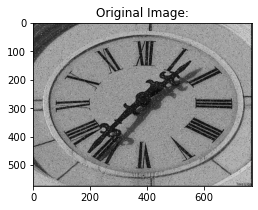

In [37]:
image = get_image("UrStoy.tif")
show_image(image)

In [38]:
def show_histogram(histogram, label = "Default histogram with 256 bins"):
    """This function plots the given histogram (in the numpy array format)"""
    plt.subplots(1,1,figsize=(9,5))    
    plt.title(label = label, fontsize=12)
    plt.plot(histogram)
    plt.show()

In [39]:
def histogram(image):
    """Returns the histogram with 256 bins.
    """
    shape = np.shape(image)
    histogram = np.zeros(256)

    if len(shape) == 3:#making sure it is a color/RGB image
        image = image.mean(axis=2)
    elif len(shape) > 3:
        raise ValueError('Must be at 2D image')

    for i in range(shape[0]):
        for j in range(shape[1]):
            pixval = int(image[i,j])
            histogram[pixval] += 1

    return histogram

In [40]:
hist = histogram(image.copy())

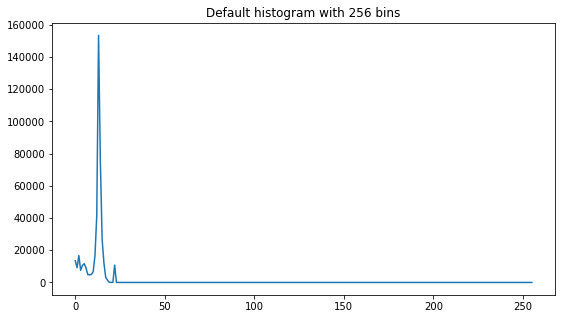

In [41]:
show_histogram(hist)

In [42]:
def cumulative_histogram(image):
    """Returns the cumulative histogram with 256 bins.
    """
    # Setup
    shape = np.shape(image)
    hist= histogram(image)

    if len(shape) == 3:#making sure it is a color/RGB image
        image = image.mean(axis=2)
    elif len(shape) > 3:
        raise ValueError('Must be at 2D image')    
        
    cumhist = np.zeros(256)
    cumhist[0] = hist[0]
    for i in range(255):
        cumhist[i+1] = cumhist[i] + hist[i+1]
    return cumhist

In [43]:
cumulitave_hist = cumulative_histogram(image)

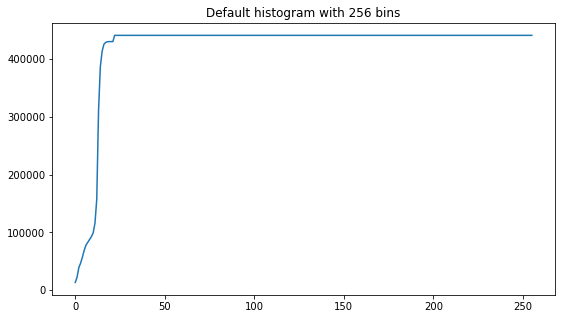

In [44]:
show_histogram(cumulitave_hist)

In [45]:
# histogram equalisation 
def histogram_equalisation(image):
    """Returns the image after histogram equalisation.
    """
    # Setup
    shape = np.shape(image)
    cumhist = cumulative_histogram(image)

    if len(shape) == 3:#making sure it is a color/RGB image
        image = image.mean(axis=2)
    elif len(shape) > 3:
        raise ValueError('Must be at 2D image')
        
        
    M = shape[0] #Row of image
    N = shape[1] # Col of image

    K = 256
    for i in range(shape[0]):#Row
        for j in range(shape[1]):#Col
            a = int(image[i,j])
            b = cumhist[a]*(K-1)/(M*N)  # here, k is 256 
            image[i,j] = b

    return image


In [46]:
hist_equalisation_img = histogram_equalisation(image.copy())

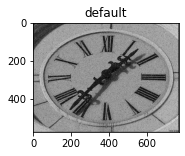

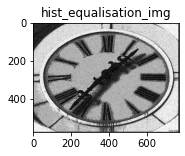

In [47]:
show_image(image, "default", (6,2))
show_image(hist_equalisation_img, "hist_equalisation_img", (6,2))

# after histogram equalisation, the image contrast has increased and the edges are much more visible now

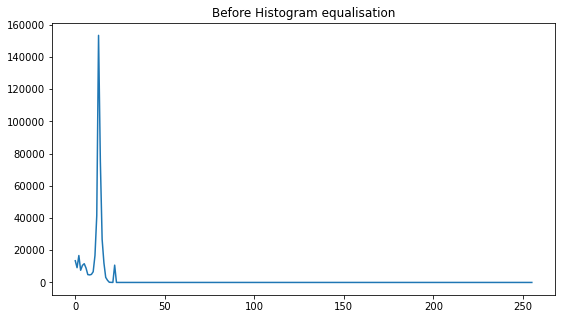

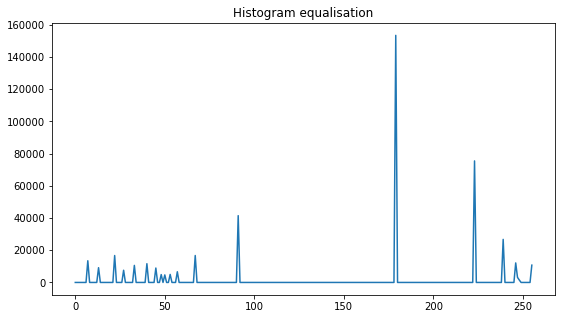

In [48]:
show_histogram(histogram(image), "Before Histogram equalisation") 
show_histogram(histogram(hist_equalisation_img), "Histogram equalisation") 
#original hostpgram has been stretched for increasing contrast

# Task with opencv

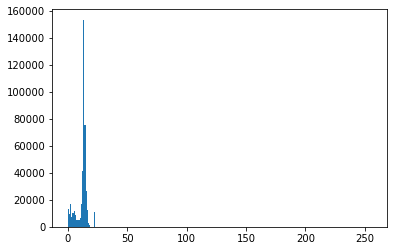

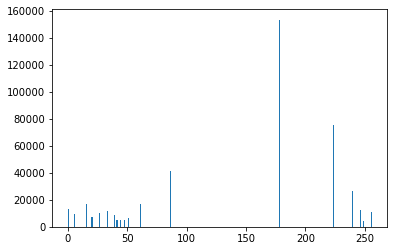

In [49]:
import cv2 as cv
img = cv.imread("UrStoy.tif",0)

#default histogram
plt.hist(img.ravel(),256,[0,256]) # img.ravel()--returns 1D flatten array
plt.show()

#histogram equalisation
dst = cv.equalizeHist(img)
plt.hist(dst.ravel(),256,[0,256])
plt.show()
# show_histogram(hist_equalisation, "Histogram equalisation")

## Task using skimage

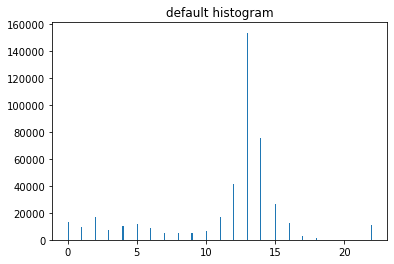

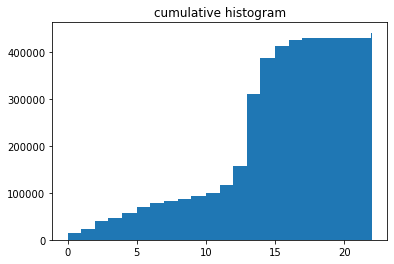

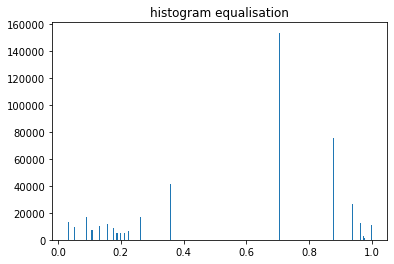

In [66]:
from skimage import exposure

image = get_image("UrStoy.tif") 
#default hist
plt.hist(image.ravel(), bins = 256)
plt.title("default histogram")
plt.show()

#cumilative hist
plt.hist(image.ravel(), bins = 256, cumulative = True)
plt.title("cumulative histogram")
plt.show()

#executing the Histogram Equalization---stretching the histogram--for increasing the contrast of the image
hist_image = exposure.equalize_hist(image) #returns the image after hist equalisation
# show_image(hist_image, "Hist equalisation")
plt.hist(hist_image.ravel(), bins = 256)
plt.title("histogram equalisation")
plt.show()


## Task2
Try to remove some noise in the image by applying  a 
- gaussian filter, 
- a mean filter and 
- a median filter.

- Try also the non local mean-filter (Links to an external site.) https://scikit-image.org/docs/dev/auto_examples/filters/plot_nonlocal_means.html
    

Here you can read more about filters in Scikit image her (Links to an external site.). https://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean



- Try with different sizes of the filter windows. 
- Compute the residual between the histogram equalised image and the noise corrected image for each of the filters you try. 

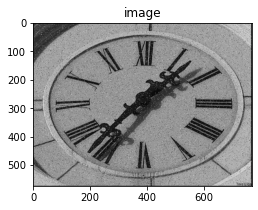

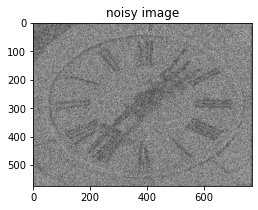

mean noisy 0.19500735381502446


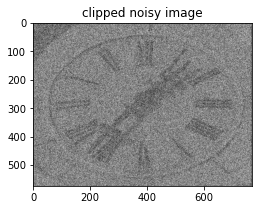

mean clipped noisy 0.19500735381502446


In [51]:
#importing the image
image = get_image("UrStoy.tif")  # do not need to convert it to gray using rgb2gray, its already gray
show_image(image, "image", (7,3))

#making the image values float, instead of int
image = img_as_float(image) 


#adding random noises to the image
noisy = image  + 0.3*np.random.random(image.shape) 
show_image(noisy, "noisy image", (7,3))
print("mean noisy", np.mean(noisy))


noisy = np.clip(noisy,   a_min = 0, a_max = 1) #how,,it is helping? HELP
show_image(noisy, "clipped noisy image", (7,3))###I cannot see the difference
print("mean clipped noisy", np.mean(noisy))

# if greater than 1, it will replace the value with 1. 
 # if less than 0, it will replace the value with 0. 
    
# Given an interval, values outside the interval are clipped to the interval edges. 
# For example, if an interval of [0, 1] is specified, 
# values smaller than 0 become 0, and values larger than 1 become 1.
# numpy.clip(a, a_min, a_max, out=None, **kwargs)


### Denoising filters
This example compares several denoising filters available in scikit-image: 

    - a Gaussian filter, 
    - a median filter, 
    - mean filter
    - Non-local means denoising for preserving textures
    
#### Median filter

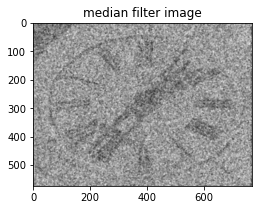

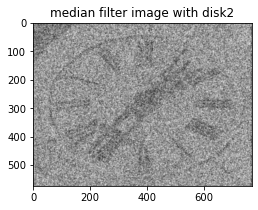

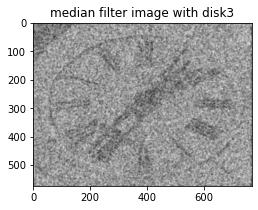

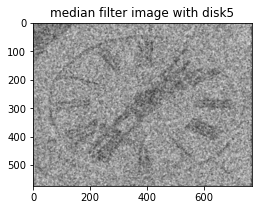

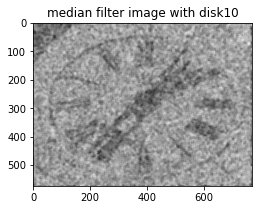

In [67]:
##applying the median filter
#https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.median
medima = median(noisy, np.ones((5, 5))) #SQUARE
show_image(medima, "median filter image", (7,3))

medima2 = median(noisy, disk(2))
show_image(medima2, "median filter image with disk2", (7,3))

medima3 = median(noisy, disk(3)) 
show_image(medima3, "median filter image with disk3", (7,3))

medima5 = median(noisy, np.ones((5, 5))) 
show_image(medima5, "median filter image with disk5", (7,3))

medima10 = median(noisy, np.ones((10, 10))) 
show_image(medima10, "median filter image with disk10", (7,3))


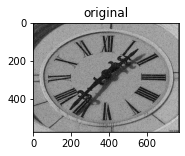

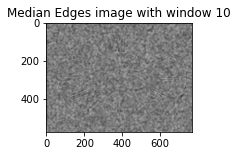

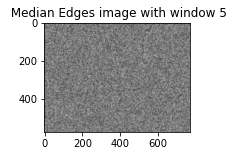

In [54]:
#Median edges through subtraction
show_image(image, "original", (6,2))

difference = image - medima10
show_image(difference, "Median Edges image with window 10", (6,2))

difference = image - medima5
show_image(difference, " Median Edges image with window 5", (6,2))

#### Gausian Filter

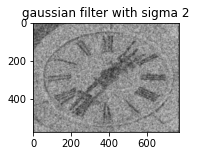

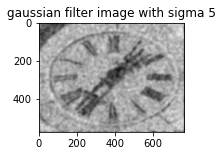

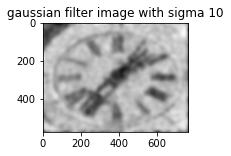

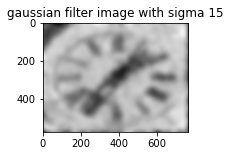

In [55]:
#applying the gausian filtergaussian
#https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian
gaussima_2 = gaussian(noisy, sigma = 2) 
show_image(gaussima_2, "gaussian filter with sigma 2", (6,2))

gaussima_5 = gaussian(noisy, sigma = 5) 
show_image(gaussima_5, "gaussian filter image with sigma 5", (6,2))

gaussima_10 = gaussian(noisy, sigma = 10) 
show_image(gaussima_10, "gaussian filter image with sigma 10", (6,2))

gaussima_15 = gaussian(noisy, sigma = 15) 
show_image(gaussima_15, "gaussian filter image with sigma 15", (6,2))


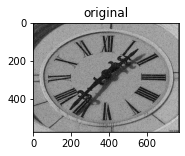

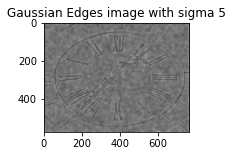

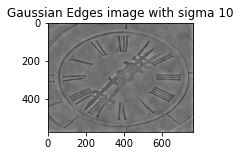

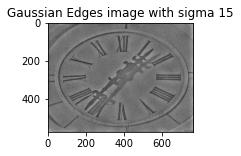

In [56]:
#Gaussian edges through subtraction
show_image(image, "original", (6,2))
gaussian_difference1 = image - gaussima_5
show_image(gaussian_difference1, "Gaussian Edges image with sigma 5", (6,2))

gaussian_difference10 = image - gaussima_10
show_image(gaussian_difference10, "Gaussian Edges image with sigma 10", (6,2))

gaussian_difference15 = image - gaussima_15
show_image(gaussian_difference15, "Gaussian Edges image with sigma 15", (6,2))

### Mean filter

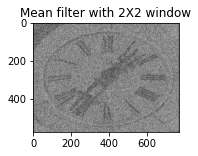

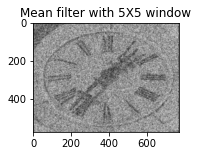

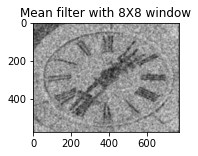

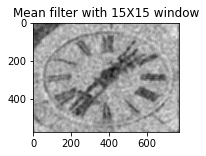

In [59]:
from skimage import img_as_ubyte as byte_convo

img_mean2 = mean(byte_convo(noisy), footprint = np.ones((2, 2)))
show_image(img_mean2, "Mean filter with 2X2 window", (6,2))

img_mean5 = mean(byte_convo(noisy), footprint = np.ones((5, 5)))
show_image(img_mean5, "Mean filter with 5X5 window", (6,2))

img_mean8 = mean(byte_convo(noisy), footprint = np.ones((8, 8)))
show_image(img_mean8, "Mean filter with 8X8 window", (6,2))

img_mean15 = mean(byte_convo(noisy), footprint = np.ones((15, 15)))
show_image(img_mean15, "Mean filter with 15X15 window", (6,2))

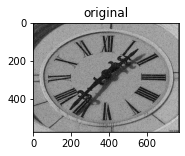

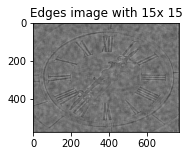

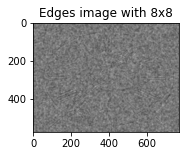

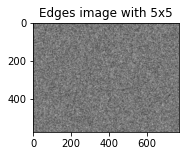

In [69]:
#MEAN edges through subtraction
show_image(image, "original", (6,2))
difference = image-img_mean15
show_image(difference, "Edges image with 15x 15", (6,2))

difference = image-img_mean8
show_image(difference, "Edges image with 8x8", (6,2))

difference = image-img_mean5
show_image(difference, "Edges image with 5x5", (6,2))

#### Non local denoising using denoise_nl_means
 Perform non-local means denoising on 2D-4D grayscale or RGB images.
 
 denoise_nl_means(image, patch_size=7, patch_distance=11, h=0.1, multichannel=False, fast_mode=True, sigma=0.0, *, preserve_range=False, channel_axis=None)[so

https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.denoise_nl_means

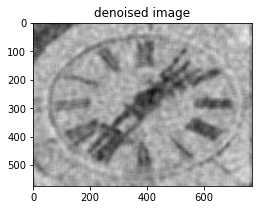

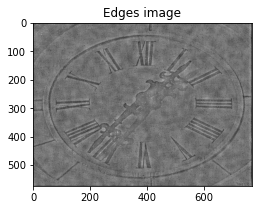

In [61]:
#denoising the image  with  denoise_nl_means with fast_mode=slow,, by default false-slow

denoise = denoise_nl_means(noisy, patch_size = 7, patch_distance= 9, sigma = 0.08) 
#denoise = denoise_nl_means(noisy, 7, 9, 0.08) 
show_image(denoise, "denoised image", (7,3))

#edges through subtraction
difference = image-denoise 
show_image(difference, "Edges image slow mode", (7,3))

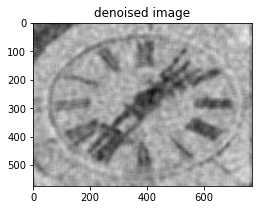

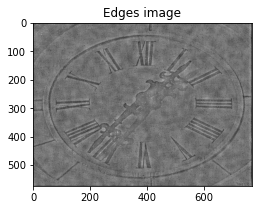

In [62]:
#denoising the image  with  denoise_nl_means with fast mode

denoise = denoise_nl_means(noisy, patch_size = 7, patch_distance= 9, sigma = 0.08, fast_mode=True) 
#denoise = denoise_nl_means(noisy, 7, 9, 0.08) 
show_image(denoise, "denoised image", (7,3))

#edges through subtraction
difference = image-denoise 
show_image(difference, "Edges image fast mode", (7,3))

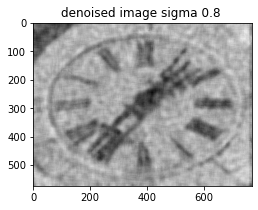

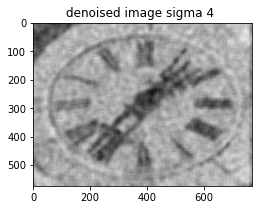

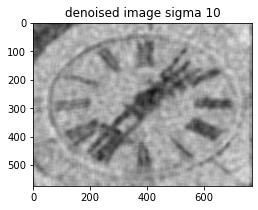

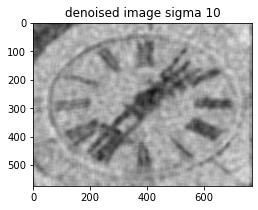

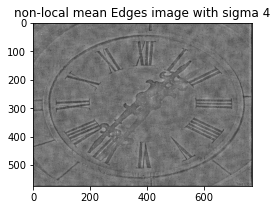

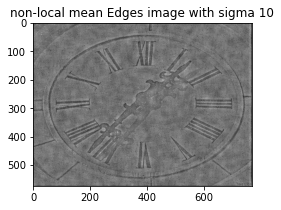

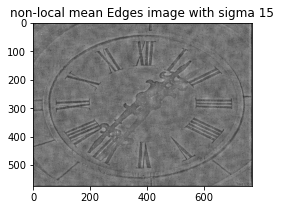

In [63]:
#denoising the image  with  denoise_nl_means with fast mode

denoise8 = denoise_nl_means(noisy, patch_size = 7, patch_distance= 9, sigma = 0.8, fast_mode=True) 
show_image(denoise, "denoised image sigma 0.8 ", (7,3))

denoise4 = denoise_nl_means(noisy, patch_size = 7, patch_distance= 9, sigma = 4, fast_mode=True) 
show_image(denoise, "denoised image sigma 4 ", (7,3))

denoise10 = denoise_nl_means(noisy, patch_size = 7, patch_distance= 9, sigma = 10, fast_mode=True) 
show_image(denoise, "denoised image sigma 10", (7,3))

denoise15 = denoise_nl_means(noisy, patch_size = 7, patch_distance= 9, sigma = 15, fast_mode=True) 
show_image(denoise, "denoised image sigma 10", (7,3))

#edges through subtraction
# non_local_difference1 = image - denoise8 
# show_image(non_local_difference1, "Edges image with sigma 0.8", (7,3))

non_local_difference2 = image - denoise4 
show_image(non_local_difference2, "non-local mean Edges image with sigma 4", (7,3))

non_local_difference3 = image - denoise10
show_image(non_local_difference3, "non-local mean Edges image with sigma 10", (7,3))

non_local_difference4 = image - denoise15
show_image(non_local_difference4, "non-local mean Edges image with sigma 15", (7,3))

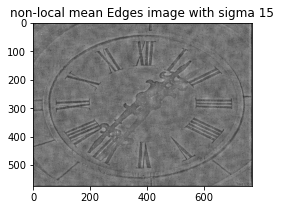

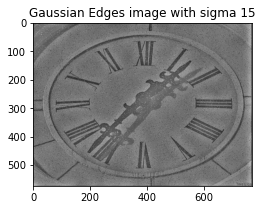

In [64]:
#Comparing gaussian & non-local mean same sigma=15
show_image(non_local_difference4, "non-local mean Edges image with sigma 15", (7,3))
show_image(gaussian_difference15, "Gaussian Edges image with sigma 15", (7,3))

## Task3
Which filter do you think worked the best ?

The noise in this image is added using a random function. Different filters can be useful depending on the type of noise you have in the image.

 Answer:
 
 - Gaussian filter best for detecting edges. Best result with sigma=15
 - Non-local mean filter detected edges best with sigma = 15
 - TV filter barely detected edges
 - Mean filter barely detected edges, worse than TV
 - Median filter unable to detect edges
   
  
 With the same sigma value, between Gaussian  & Non-local mean, <b>Gaussian showed best results</b>
